<a href="https://colab.research.google.com/github/IceikSky/NM/blob/main/%D0%9B%D0%A0_13_%D0%A7%D0%9C_%D0%A0%D0%BE%D0%B7%D0%B2'%D1%8F%D0%B7%D0%B0%D0%BD%D0%BD%D1%8F_%D0%B4%D0%B8%D1%84_%D1%80%D1%96%D0%B2%D0%BD%D1%8F%D0%BD%D1%8C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Лабораторна робота 13.

Григоришен Влад Варіант 6

#Метод Ейлера

x = [0.6 0.8 1.  1.2 1.4 1.6] 
y = [0.8    0.9701 1.1905 1.464  1.7933 2.1807]


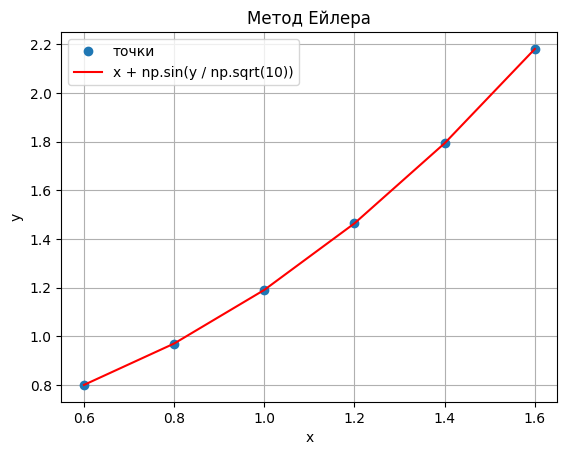

In [45]:
import numpy as np
import matplotlib.pyplot as plt

def f(x, y):
    return x + np.sin(y / np.sqrt(10))

# Вводимо параметри (ліва, права межі відрізку, крок, початкова умова)
a = 0.6
b = 1.6
h = 0.2
y0 = 0.8

# Перевірка вхідних параметрів
if h <= 0:
    print("Крок h повинен бути позитивним.")
    exit()
if a >= b:
    print("Права межа b повинна бути більшою за ліву межу a.")
    exit()

n = int((b - a) / h) # кількість кроків

x = np.array([a + i*h for i in range(n + 1)]) # задаємо x генератором списків

y = np.empty(n + 1)
y[0] = y0

for i in range(n):
    y[i + 1] = y[i] + f(x[i], y[i]) * h

y_rounded = np.round(y, 4)
print("x =", x, "\ny =", y_rounded)

plt.plot(x, y, "o", x, y, "red")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Метод Ейлера")
plt.legend(["точки", "x + np.sin(y / np.sqrt(10))"])
plt.grid()
plt.show()

In [46]:
#Додати перевірку odeint для першого завдання


In [47]:
#додати перевірку solve_ivp для перешого завдання

#Метод Ейлера-Коші

x = [0.6 0.8 1.  1.2 1.4 1.6] 
y = [0.8    0.9952 1.2437 1.5483 1.9114 2.3348]


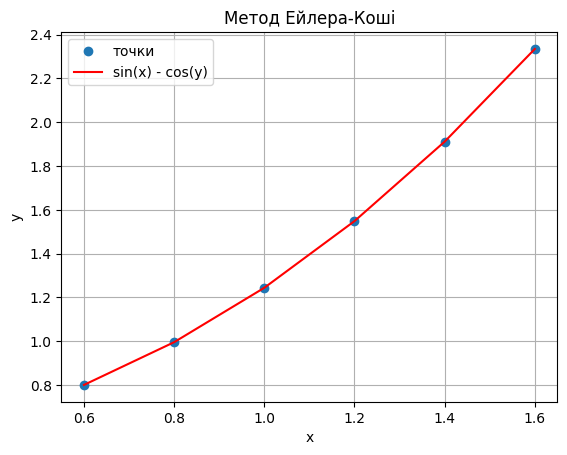

In [48]:
import numpy as np
import matplotlib.pyplot as plt

def f(x, y):
    return x + np.sin(y / np.sqrt(10))

a = 0.6
b = 1.6
h = 0.2
y0 = 0.8
n = int(np.round((b - a) / h))

# Генерація x, враховуючи останнє значення
x = np.arange(a, b + h, h)  # Задати x з включенням b

x = np.linspace(a, b, n + 1)
y[0] = y0

# Метод Ейлера-Коші
for i in range(n):
    # Використовується середнє значення для нахилу
    y[i + 1] = y[i] + (f(x[i], y[i]) + f(x[i + 1], y[i] + h * f(x[i], y[i]))) * h / 2

y_rounded = np.round(y, 4)

print("x =", x, "\ny =", y_rounded)

# Візуалізація
plt.plot(x, y, "o", x, y, "red")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Метод Ейлера-Коші")
plt.legend(["точки", "sin(x) - cos(y)"])
plt.grid()
plt.show()


#Розв’язок диф. Рівняння за допомогою scipy.integrate import odeint

x= [0.  0.2 0.4 0.6 0.8 1. ]
y= [0.8        0.87203357 0.98982279 1.15613341 1.37374765 1.64534799]


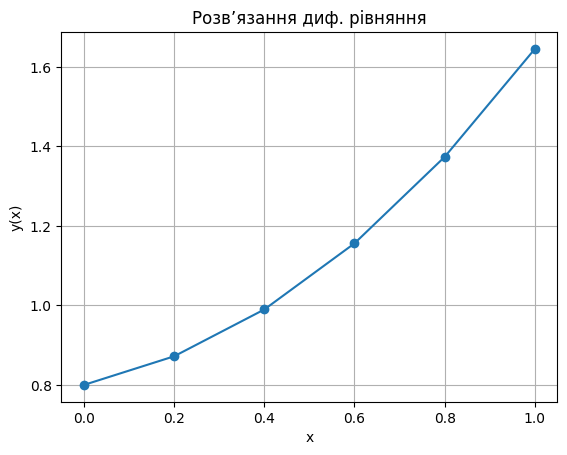

In [49]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Функція, що повертає dy/dx
def model(y, x):
     return x + np.sin(y / np.sqrt(10))

# Початкова умова
y0 = 0.8
a = 0.6
b = 1.6
h = 0.2

# Значення x
x = np.array([i * 0.2 for i in range(0, 6)])

# Розв'язання ODE
y = odeint(model, y0, x)

# Виведення результатів
print('x=', x)
print('y=', y.flatten())  # Перетворення в одновимірний масив для виводу

# Побудова графіка результатів
plt.plot(x, y, marker='o')
plt.xlabel('x')
plt.ylabel('y(x)')
plt.title('Розв’язання диф. рівняння')
plt.grid()
plt.show()


#Використання scipy.integrate.solve_ivp
Функція solve_ivp є більш сучасним і гнучким способом розв'язання ODE, ніж odeint. Вона також дозволяє використовувати різні методи інтегрування.

x= [0.  0.2 0.4 0.6 0.8 1. ]
y= [1.         1.08449556 1.21538178 1.39539308 1.62712509 1.91301614]


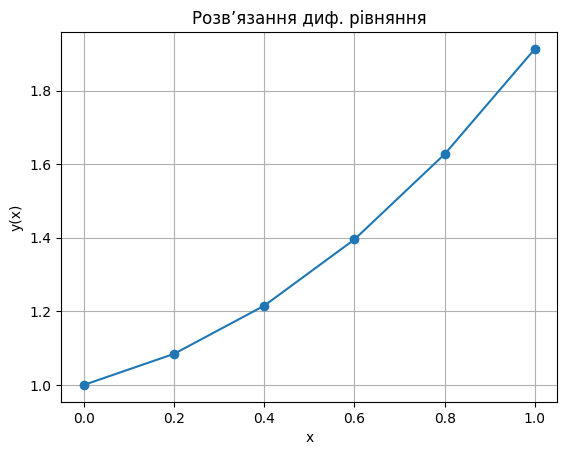

In [50]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Функція, що повертає dy/dx
def model(x, y):
    return x + np.sin(y / np.sqrt(10))

# Початкова умова
y0 = [1]  # Потрібно передати як список

# Значення x
x = np.linspace(0, 1, 6)

# Розв'язання ODE
sol = solve_ivp(model, [0, 1], y0, t_eval=x)

# Виведення результатів
print('x=', sol.t)
print('y=', sol.y[0])

# Побудова графіка результатів
plt.plot(sol.t, sol.y[0], marker='o')
plt.xlabel('x')
plt.ylabel('y(x)')
plt.title('Розв’язання диф. рівняння')
plt.grid()
plt.show()
